In [1]:
import gymnasium as gym
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

import PPO
import rl_utils

actor_lr = 1e-3
critic_lr = 1e-2
num_episodes = 500
hidden_dim = 128
gamma = 0.98
lmbda = 0.95
epochs = 10
eps = 0.2
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'device:{device}')
env_name = 'CartPole-v1'
env = gym.make(env_name)
# env.seed(0)
torch.manual_seed(0)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.n
agent = PPO.PPO(state_dim, hidden_dim, action_dim, actor_lr, critic_lr, lmbda,
            epochs, eps, gamma, device)

return_list = rl_utils.train_on_policy_agent(env, agent, num_episodes)

device:cuda


Iteration 0:   0%|          | 0/50 [00:00<?, ?it/s]/root/autodl-tmp/code/python/learn_ppo/PPO.py:48: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  state = torch.tensor([state], dtype=torch.float).to(self.device)
Iteration 9: 100%|██████████| 50/50 [00:14<00:00,  3.55it/s, episode=500, return=500.000]


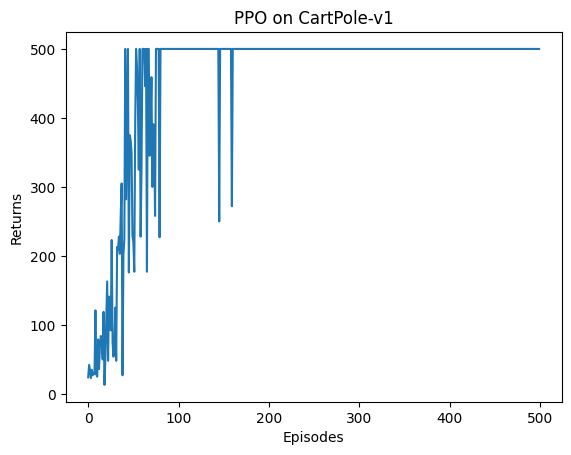

In [2]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title(f'PPO on {env_name}')
plt.show()

In [ ]:
l = np.array([1, 2, 3, 4])
print(l.size)
t = torch.tensor(l)
print(t.shape)

In [3]:
import gymnasium as gym
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

import PPO
import rl_utils

actor_lr = 1e-4
critic_lr = 5e-3
num_episodes = 2000
hidden_dim = 128
gamma = 0.9
lmbda = 0.9
epochs = 10
eps = 0.2
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(f'device: {device}')

env_name = 'Pendulum-v1'
env = gym.make(env_name)
# env.seed(0)
torch.manual_seed(0)
state_dim = env.observation_space.shape[0]
action_dim = env.action_space.shape[0]
print(f'state_dim: {state_dim}, action_dim: {action_dim}')
agent = PPO.PPOContinuous(state_dim, hidden_dim, action_dim, actor_lr, critic_lr,
                          lmbda, epochs, eps, gamma, device)

return_list = rl_utils.train_on_policy_agent(env, agent, num_episodes)


device: cuda
state_dim: 3, action_dim: 1


Iteration 9: 100%|██████████| 200/200 [00:31<00:00,  6.38it/s, episode=2000, return=-256.991]


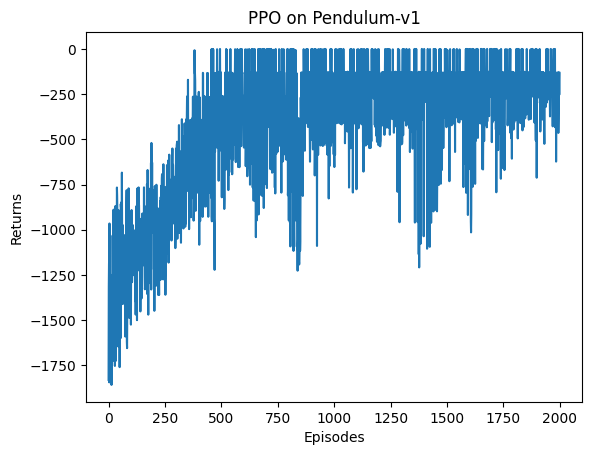

In [4]:
episodes_list = list(range(len(return_list)))
plt.plot(episodes_list, return_list)
plt.xlabel('Episodes')
plt.ylabel('Returns')
plt.title(f'PPO on {env_name}')
plt.show()